In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [15]:
#Reading data from banking.csv
data = pd.read_csv('banking.csv')

In [16]:
#finding number of missing values in each column
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

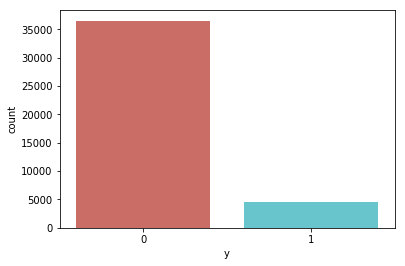

In [17]:
#Checking the dataset is balance or not.
sns.countplot(x = 'y', data = data, palette = 'hls')
plt.show()

In [18]:
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1

#Removing catagorical features from the dataset
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

data_final=data[to_keep]
data_final.columns.values

#Removing traget variable from the dataset
data_final_vars=data_final.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]


logreg = LogisticRegression()
rfe = RFE(logreg, 18)
rfe = rfe.fit(data_final[X], data_final[y] )
print(rfe.support_)
print(rfe.ranking_)

[False False False False  True False False False  True False False  True
 False False False  True False  True  True False False False False False
 False False False False False False False False False  True  True False
 False False False False False False False False  True  True  True False
 False False  True  True  True False False False  True False False False
  True  True  True]
[39 36 12 42  1 15 20 19  1 31 11  1 29 41 43  1 35  1  1 13 22 44  3  4
  5 45 26 10  6 28 40 34  9  1  1 16 46 21 18 37 14 33 17 25  1  1  1 23
 24 27  1  1  1 32  7  8  1 38 30  2  1  1  1]


In [5]:
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for i in cat_vars:
    le.fit(data[i])
    data[i]=le.transform(data[i])

data_final_vars=data.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]

from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 18)
rfe = rfe.fit(data[X], data[y] )
print(rfe.support_)
print(rfe.ranking_)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[ True  True  True  True  True False  True  True  True  True  True  True
 False  True  True  True  True  True  True  True]
[1 1 1 1 1 3 1 1 1 1 1 1 2 1 1 1 1 1 1 1]
